https://www.bbc.com/news/articles/cvgvn5jvkgjo

Student flats at empty nightclub site turned down

Plans to build student flats on the site of a vacant nightclub have been rejected by councillors, despite their own planning officers supporting the scheme.

Regal Property Stroud wanted to build 30 studio flats and two six-bed houses in multiple occupation (HMOs) at the former site of Roxanne's on Ocean Road in South Shields.

South Tyneside Council's planning officers backed the scheme but the development attracted dozens of objections from locals who cited a range of concerns, from a lack of parking to an "overconcentration of HMOs".

The council's planning committee rejected the plans and said the building would have impacted the "character and amenity of the area".

If approved, the student apartment building would have contained communal kitchens as well as study space, a gym, a cinema room and cycle storage, according to the Local Democracy Reporting Service.

Regal Property Stroud said the development would have contributed "positively" to the area and it had been designed to meet "modern living needs" while maintaining elements of the building's existing structure.

'Enough student accommodation'
The plans first went before the council in July but were deferred twice to give objectors more chance to comment and for the council to discuss a number of issues with the developer.

These included the possibility of adding a concierge service to the building, the removal of the HMOs, or for the HMOs to be made student-only.

In a report to councillors the developer confirmed the building would only be used for "full-time students".

But at a meeting this week, councillors raised concerns the developer could later apply to change who would be allowed to live there.

"I know they said this is for students but I think in a short space of time it will be flipped so that it will accommodate anybody and everybody," said councillor Joan Hamilton.

Councillor Paul Brenen said there was "enough student accommodation already" and the plans would "change the character of the local area".

Other concerns included privacy from nearby buildings and highway safety concerns related to bin collections.

The council unanimously voted to reject the plans.

1. Data & context — briefly describe the text source and why you chose it (2–3 sentences).
> The source is a BBC article by Chris Binding. BBC stands for British Broadcasting Corporation, and it is UK's public service broadcaster known for its news, radio, and television programs.I chose it, because it was the first news station that came to my mind.

In [ ]:
# 2. Regex extraction — implement ≥3 patterns (e.g., emails, dates, phone numbers, hashtags, URLs, numbers). Show matches and 1–2 lines on accuracy/edge cases.

import re

text = """Student flats at empty nightclub site turned down

Plans to build student flats on the site of a vacant nightclub have been rejected by councillors, despite their own planning officers supporting the scheme.

Regal Property Stroud wanted to build 30 studio flats and two six-bed houses in multiple occupation (HMOs) at the former site of Roxanne's on Ocean Road in South Shields.

South Tyneside Council's planning officers backed the scheme but the development attracted dozens of objections from locals who cited a range of concerns, from a lack of parking to an "overconcentration of HMOs".

The council's planning committee rejected the plans and said the building would have impacted the "character and amenity of the area".

If approved, the student apartment building would have contained communal kitchens as well as study space, a gym, a cinema room and cycle storage, according to the Local Democracy Reporting Service.

Regal Property Stroud said the development would have contributed "positively" to the area and it had been designed to meet "modern living needs" while maintaining elements of the building's existing structure.

'Enough student accommodation'
The plans first went before the council in July but were deferred twice to give objectors more chance to comment and for the council to discuss a number of issues with the developer.

These included the possibility of adding a concierge service to the building, the removal of the HMOs, or for the HMOs to be made student-only.

In a report to councillors the developer confirmed the building would only be used for "full-time students".

But at a meeting this week, councillors raised concerns the developer could lat"""

# Pattern 1: Find all numbers
numbers = re.findall(r'\d+', text)
print("Numbers found:", numbers)
# Accuracy/Edge cases: This pattern finds all sequences of digits. It might pick up numbers within words if they exist.

# Pattern 2: Find the month "July"
july_month = re.findall(r'July', text)
print("\n'July' found:", july_month)
# Accuracy/Edge cases: This is a simple match for the exact word "July". It won't find variations like "jul" or "JULY".

# Pattern 3: Find the word "council" (case-insensitive)
council_word = re.findall(r'[Cc]ouncil', text)
print("\n'Council' or 'council' found:", council_word)
# Accuracy/Edge cases: This pattern finds both "Council" and "council". It won't find variations like "councils".

Numbers found: ['30']

'July' found: ['July']

'Council' or 'council' found: ['council', 'Council', 'council', 'council', 'council', 'council', 'council']


In [ ]:
# 3. NLP preprocessing — tokenize → lowercase → remove stop words → stem or lemmatize (pick one and say why). Show top 15 tokens after preprocessing.

import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# Tokenize the text
tokens = word_tokenize(text)

# Convert tokens to lowercase
tokens_lower = [word.lower() for word in tokens]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens_lower if word not in stop_words]

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
# Need part of speech tags for better lemmatization, but for simplicity in a beginner example,
# we'll use the default which assumes nouns.
tokens_lemmatized = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]

# Remove punctuation and non-alphabetic tokens
tokens_cleaned = [word for word in tokens_lemmatized if word.isalpha()]

# Count token frequencies
token_counts = Counter(tokens_cleaned)

# Get the top 15 most common tokens
top_15_tokens = token_counts.most_common(15)

print("Top 15 tokens after preprocessing:")
for token, count in top_15_tokens:
    print(f"{token}: {count}")

# Explanation of lemmatization vs stemming:
# Lemmatization reduces words to their base or dictionary form (lemma), considering the word's meaning and part of speech.
# Stemming is a cruder process that removes suffixes to find the root form of a word, without considering its meaning.
# Lemmatization is generally preferred for tasks where the meaning of the word is important.

Top 15 tokens after preprocessing:
student: 5
building: 5
hmo: 4
council: 4
would: 4
flat: 3
site: 3
plan: 3
councillor: 3
planning: 3
developer: 3
nightclub: 2
build: 2
rejected: 2
officer: 2


In [ ]:
# 4. Regex + NLP combo — one small combined extraction (e.g., (number, following-noun) pairs or simple entity/product extraction) with a short comment.

# Find all numbers using regex
numbers_found = re.finditer(r'\d+', text)

# Tokenize the text to easily find words by index
tokens = word_tokenize(text)

# Find the word immediately following each number
extractions = []
for match in numbers_found:
    number = match.group(0)
    # Find the index of the token that matches the number
    try:
        # Find the starting index of the number in the original text
        start_index = match.start()
        # Find the token index that corresponds to the start index
        token_index = -1
        current_length = 0
        for i, token in enumerate(tokens):
            # Simple check: if the token's start position is around the number's start position
            # This is a basic approach for beginners and might need refinement for complex cases
            if text[start_index:start_index + len(number)] == token or \
               text[start_index:start_index + len(token)] == token: # Check if token starts at index
                token_index = i
                break
            # Account for spaces and punctuation when calculating position (basic approach)
            current_length += len(token) + 1 # Add 1 for a space or punctuation

        if token_index != -1 and token_index + 1 < len(tokens):
            following_word = tokens[token_index + 1]
            extractions.append((number, following_word))
        elif token_index != -1 and token_index + 1 == len(tokens):
             extractions.append((number, "End of text"))


    except ValueError:
        # Handle cases where the number token isn't found in the simple token list
        pass


print("Number and following word extractions:")
if extractions:
    for num, word in extractions:
        print(f"Number: {num}, Following word: {word}")
else:
    print("No number-following word pairs found.")

# Comment: This code uses regex to find numbers and then tokenization from NLP
# to identify the word immediately after each found number. This is a basic way
# to link patterns found by regex to the words around them.

Number and following word extractions:
Number: 30, Following word: studio


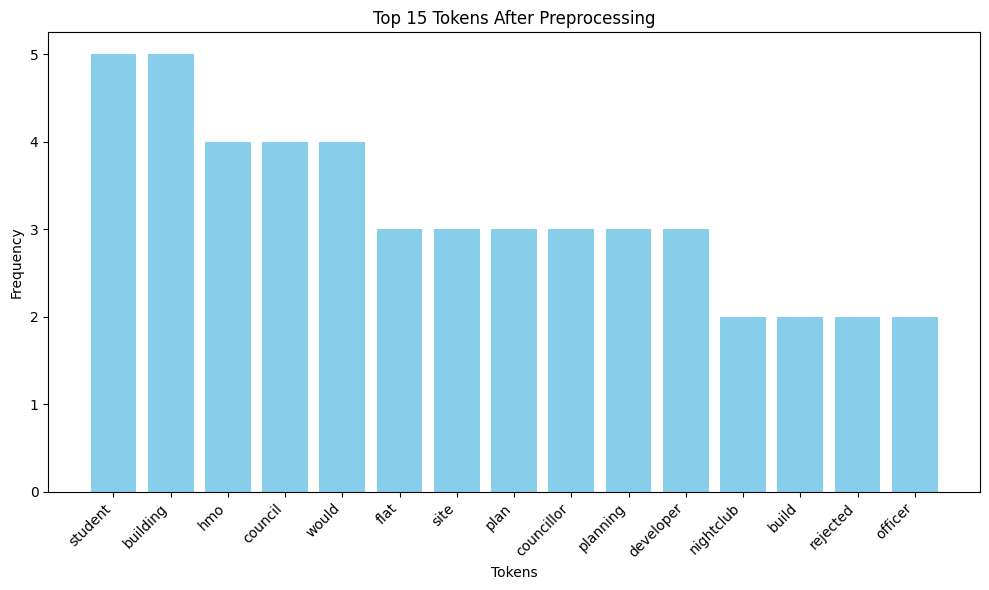

In [ ]:
# 5. Visualization — one simple chart (e.g., bar chart of top tokens).

import matplotlib.pyplot as plt

# Ensure top_15_tokens variable is available from the previous step
# If not, you would need to run the preprocessing cell first.
# top_15_tokens = [('token1', 10), ('token2', 8), ...] # Example if needed

# Separate tokens and counts for plotting
tokens = [token for token, count in top_15_tokens]
counts = [count for token, count in top_15_tokens]

# Creating the bar chart
# This is the first part I actually know how to do!
plt.figure(figsize=(10, 6))
plt.bar(tokens, counts, color='skyblue')
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.title("Top 15 Tokens After Preprocessing")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# 6. Reproducibility — notebook runs top-to-bottom with the chosen text included (pasted or as a short .txt cell).


6. Reproducibility — notebook runs top-to-bottom with the chosen text included (pasted or as a short .txt cell).
> It does run and the text is included in the beginning.
7. Comments — brief comments explaining each step.
> Done.
8. Report — a short summary (≤200 words) of your approach, challenges, and findings.
> The whole thing was a challenge, because I only know how to do one coding point out of all of them (visualisation). My approach to complete it was to firstly struggle, then after relising I cannot do it myself - use AI. I left all of the comments AI has made, so I can study from them. I found out I know even less about coding than I thought I knew.